][**Creating Data consisting of only ratings given by different users to different movies**



In [0]:
#making a rate card, here each row is a movie and each column is a user.
#I have assumed first two movies of common type ,the next two of common type and so on,hece taking 4 types of movies.
#I have taken 4 users with similar taste, therefor 4 types of tastes and 16 users

import numpy as np
y_des = np.array([[5,4,5,5,1,1,1,1,1,2,1,2,3,2,2,3],[4,5,4,4,1,1,2,1,1,1,1,2,2,1,2,3],[2,3,2,1,5,5,4,5,3,3,2,3,1,1,1,2],[1,1,2,1,4,5,5,4,2,3,1,3,2,1,1,1],[1,1,2,1,2,3,3,2,5,5,5,5,1,1,2,2],[1,1,1,1,2,2,2,3,5,4,5,4,2,1,1,2],[2,3,3,2,1,1,1,2,1,1,1,1,5,5,5,5],[3,2,2,3,2,1,1,2,1,1,1,2,5,5,4,5]])
print(y_des)

[[5 4 5 5 1 1 1 1 1 2 1 2 3 2 2 3]
 [4 5 4 4 1 1 2 1 1 1 1 2 2 1 2 3]
 [2 3 2 1 5 5 4 5 3 3 2 3 1 1 1 2]
 [1 1 2 1 4 5 5 4 2 3 1 3 2 1 1 1]
 [1 1 2 1 2 3 3 2 5 5 5 5 1 1 2 2]
 [1 1 1 1 2 2 2 3 5 4 5 4 2 1 1 2]
 [2 3 3 2 1 1 1 2 1 1 1 1 5 5 5 5]
 [3 2 2 3 2 1 1 2 1 1 1 2 5 5 4 5]]


**Finding feature vectors/Embeddings for all the movies and all the users**


In [0]:
#here I am cretinng the embeddings for every user and every movie, using the information present with us.
#I have hardcoded the dimension of each embedding  to be 3, you can change according to your need.
def model(Y_des,epochs,learning_rate):
  M = np.random.random((8,3))*0.1                 #initially taking embeddings for movies as random values
  U = np.random.random((3,16))*0.1                #initially taking embeddings for users as random values

  error_list = []                                 #list to store error at each epoch
  for i in range(epochs):
    Y_pred = np.dot(M,U)                          # this will give us the predicted rate card
    error = (1/2)*np.sum((Y_des - Y_pred)**2)     #calculating the loss on the predicted value
    error_list.append(error)
    
    temp = Y_des - Y_pred
    
    dU = np.dot(M.T,temp)                         #getting the slope for back-propagation
    dM = np.dot(temp,U.T)
    
    U = U + (1/8)*learning_rate*dU                #updating the values of the embeddings to make it come to the minima of the cost function
    M = M + (1/16)*learning_rate*dM
  
  return (M,U,error_list)
    


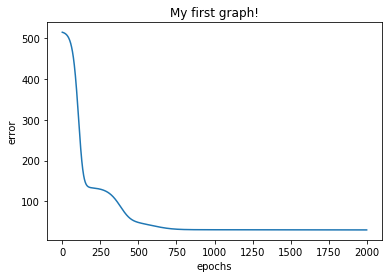

Movies:
[[ 0.45052931  2.16119907  0.16879002]
 [ 0.52838396  1.89734512  0.08308613]
 [ 1.65666483  0.22794851  1.09635093]
 [ 1.413039   -0.05415135  1.1885322 ]
 [ 1.91884366  0.33897374  0.62228729]
 [ 1.63576369  0.23925791  0.71047689]
 [-0.41391746  1.17139066  1.8673695 ]
 [-0.26348186  1.15289998  1.80804689]]



Users
[[ 0.40799658  0.51929917  0.64918702  0.29026665  1.28830756  1.66060585
   1.59124335  1.29515207  1.91667783  1.90344538  1.71067595  1.83901947
  -0.27197916 -0.58301782 -0.25063721 -0.0229308 ]
 [ 2.05276135  1.9797192   1.9708642   2.09774265 -0.03689237 -0.14458577
   0.11930827 -0.02446969  0.16492385  0.33981358  0.29410798  0.58572765
   1.20240297  0.83534927  1.03075125  1.46403259]
 [ 0.21000774  0.30350027  0.32371784  0.13190178  1.24890981  1.13526316
   0.92990071  1.48664506  0.60246026  0.58535737  0.40322021  0.6707481
   1.88084426  2.00444421  1.64243758  1.68844947]]
Final loss:
30.348276885223434


In [0]:
m,u,error = model(y_des,2000,0.01)

x = [i for i in range(2000)]
import matplotlib.pyplot as plt 
  
plt.plot(x, error) 
  
plt.xlabel('epochs') 
plt.ylabel('error') 
plt.title('My first graph!') 
plt.show() 

print("Movies:")
print(m)
print("\n\n")
print("Users")
print(u)
print("Final loss:")
print(error[-1])

In [0]:
print("Predicted value:")
print(np.dot(m,u))
print("\n\n")
print("Actual Values:")
print(y_des)

Predicted value:
[[4.65568755 4.56375461 4.60654801 4.6866768  0.71149207 0.62729405
  1.13170865 0.78155093 1.32164207 1.69076519 1.47439509 2.2076218
  2.79356533 1.88101963 2.39196631 3.4387283 ]
 [4.12782429 4.05581656 4.10932604 4.14447322 0.71449058 0.69743301
  1.14441828 0.76142971 1.37571536 1.69912872 1.49542008 2.13876575
  2.29393604 1.4434301  1.95972194 2.90594555]
 [1.37407965 1.64432151 1.87964921 1.1036625  3.49512769 3.96275601
  3.68285054 3.76993974 3.87339475 3.8725881  3.343129   3.91552992
  1.88557299 1.42212577 1.62042431 2.14686853]
 [0.71495625 0.98730537 1.19535071 0.45333203 3.30679613 3.70362717
  3.34724515 3.59835098 3.4154531  3.36695728 2.8805657  3.36409401
  1.78601506 1.51328428 1.54211322 1.89509511]
 [1.60939899 1.85639111 2.11520511 1.3501368  3.23673595 3.84389206
  3.67245498 3.40202008 4.10861331 4.13186243 3.63313339 4.14473516
  1.05612302 0.41178159 0.89053202 1.50296863]
 [1.30773102 1.53874413 1.76345545 1.07042233 2.9858615  3.48834371
 

**creating embedding for new user by knowing the movies which he likes,we use the previously calculated embeddings of the movies liked by this user**

In [0]:
#taking the case that we have a virtual user bob ,and he likes a love movie ,movie no. 1,
#this will help us test as we will learn the feature vector for bob with the help of feature vector for movie1(chosen as bob's choice)
#now with the feature vector we learnt for bob, we will find its cosine with all movies which bob has yet not watched and recomend him the one for which we get the maximum cosine value


def get_bob(liked_movie_index,epochs,learning_rate,rating):
  
  bob = np.random.random((3,1))*0.1                      #tsking random initial embedding for bob
  movie = m[liked_movie_index,:].reshape((1,3))          #getting the embedding of the movie bob liked
  errors = []
  
  for i in range(epochs):
    y = np.dot(movie,bob)
    y = np.asscalar(y)
    error = (1/2)*((rating-y)**2)
    errors.append(error)
    temp = rating-y
    dW = (movie.T)*temp
    bob = bob + (1/3)*learning_rate*dW
    
  return (bob,errors)

[[-0.3225582 ]
 [ 1.19198652]
 [ 1.85833905]]


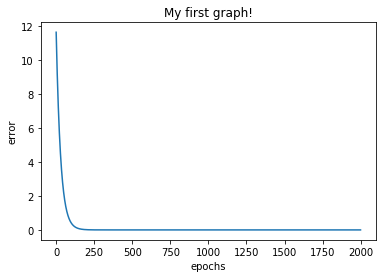

In [0]:
b,errors = get_bob(6,2000,0.01,5)
print(b)

x = [i for i in range(2000)]

plt.plot(x, errors) 
  
plt.xlabel('epochs') 
plt.ylabel('error') 
plt.title('My first graph!') 
plt.show() 

In [0]:
print(np.dot(m,b))

[[2.74446732]
 [2.24557742]
 [1.77473247]
 [1.68836081]
 [0.94153416]
 [1.07787017]
 [5.        ]
 [4.81919361]]


**Creating embeddings for a new movie ,by knowing about the users who liked it (using the previousluy calculted word embeddings of the users who liked this movie)**

In [0]:
# here we assume that a new ovie is to be added to our dataset and we need to obtain its embeddings so we do it in a way that we first find out which user l
# liked the movie and what rating he gave the movie and with the help of embedding of that user i found the embedding of the newlya dded movie.

def get_movie(liking_user_index,epochs,learning_rate,rating):
  
  movie = np.random.random((1,3))*0.1
  bob = u[:,liking_user_index].reshape((3,1))
  errors = []
  
  for i in range(epochs):
    y = np.dot(movie,bob)
    y = np.asscalar(y)
    error = (1/2)*((rating-y)**2)
    errors.append(error)
    temp = rating-y
    dM = (bob.T)*temp
    movie = movie + (1/3)*learning_rate*dM
    
  return (movie,errors)

[[2.29587226 0.48755948 0.79311075]]


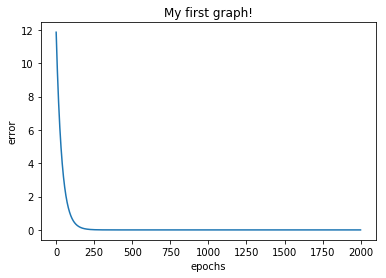

In [0]:
movie,errors = get_movie(9,2000,0.01,5)
print(movie)

x = [i for i in range(2000)]

plt.plot(x, errors) 
  
plt.xlabel('epochs') 
plt.ylabel('error') 
plt.title('My first graph!') 
plt.show() 

In [0]:
print(np.dot(movie,u))

[[2.10411069 2.39818476 2.70810811 1.7938022  3.93032616 4.64243415
  4.4489756  4.14064745 4.95867535 5.         4.39068688 5.03970838
  1.45353134 0.65849426 1.22975641 2.0002842 ]]
